<a href="https://colab.research.google.com/github/honghusldl/learning-pathway/blob/main/pytorch_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [2]:
n_points = 100
# cluster centers
centers = [[-0.5,0.5],[0.5,-0.5]]
X,y = datasets.make_blobs(n_samples = n_points,
                          random_state = 123,
                          centers = centers,
                          cluster_std = 0.4) # cluster standard deviation adjust how dense the data points are 
# creating clusters randomly

x_data = torch.Tensor(X)
#we need to adjust size of y_data to match rows and columns of predicted values to compute loss
#ValueError: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
#y_data = torch.Tensor(y)
y_data = torch.Tensor(y.reshape(100,1)) # reshape y to 100 rows and 1 col

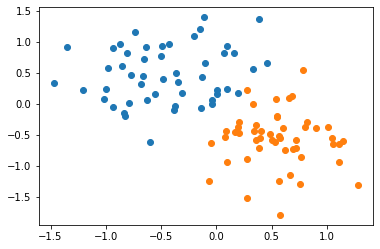

In [3]:
def scatter_plot():
  plt.scatter(X[y==0, 0],X[y==0, 1])
  plt.scatter(X[y==1, 0],X[y==1, 1])

scatter_plot()

In [19]:
class Model(nn.Module):
  def __init__(self,input_size,output_size):
    super().__init__()
    self.linear = nn.Linear(input_size,output_size)
  def forward(self,x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  def predict(self,x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [20]:
torch.manual_seed(2)
model = Model(2,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [21]:
[w,b]=model.parameters()
w1,w2 = w.view(2)
b1 = b[0]
def get_params():
  return (w1.item(),w2.item(),b1.item())

In [22]:
def plot_fit(title):
  plt.title = title
  w1,w2,b1 = get_params()
  x1 = np.array([-2.0,2.0])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1,x2,'r')
  scatter_plot()

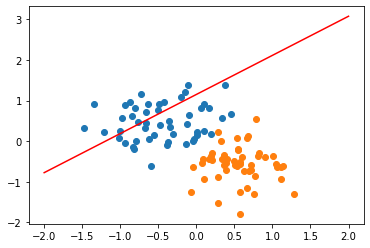

In [23]:
plot_fit('initial model')

In [24]:
criterion = nn.BCELoss() # binary cross entropy
optimizer = torch.optim.SGD(model.parameters(),lr=0.01) # specify parameters of the model and learning rate

In [25]:
epochs = 1500
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data) # use criterion to compute loss
  print("epoch:", i, "loss", loss.item())

  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward() # derivative, or gradient of lost function 
  optimizer.step()

epoch: 0 loss 0.6185115575790405
epoch: 1 loss 0.617464005947113
epoch: 2 loss 0.6164200305938721
epoch: 3 loss 0.6153795123100281
epoch: 4 loss 0.6143423318862915
epoch: 5 loss 0.6133086681365967
epoch: 6 loss 0.612278401851654
epoch: 7 loss 0.6112514734268188
epoch: 8 loss 0.6102280020713806
epoch: 9 loss 0.6092078685760498
epoch: 10 loss 0.6081911325454712
epoch: 11 loss 0.607177734375
epoch: 12 loss 0.6061676740646362
epoch: 13 loss 0.6051609516143799
epoch: 14 loss 0.604157567024231
epoch: 15 loss 0.6031573414802551
epoch: 16 loss 0.6021605730056763
epoch: 17 loss 0.6011670231819153
epoch: 18 loss 0.6001767516136169
epoch: 19 loss 0.5991896986961365
epoch: 20 loss 0.5982059240341187
epoch: 21 loss 0.5972253680229187
epoch: 22 loss 0.5962480306625366
epoch: 23 loss 0.5952739119529724
epoch: 24 loss 0.5943029522895813
epoch: 25 loss 0.5933352112770081
epoch: 26 loss 0.5923706293106079
epoch: 27 loss 0.5914091467857361
epoch: 28 loss 0.5904508233070374
epoch: 29 loss 0.58949565887451

Text(0.5, 0, 'epoch')

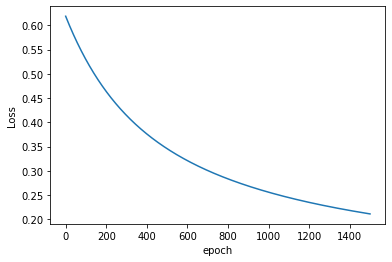

In [26]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

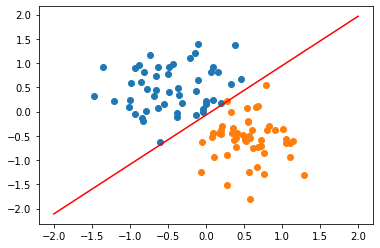

In [27]:
plot_fit('Trained model')

model testing

red point positive probability= 0.9676696062088013
black point positive probability= 0.02530478499829769
red point in class 1
black point in class 0


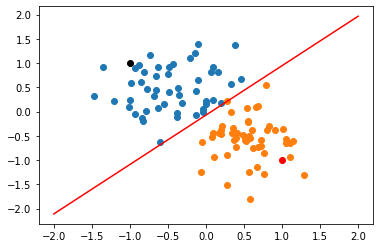

In [29]:
point1 = torch.Tensor([1.0,-1.0])
point2 = torch.Tensor([-1.0,1.0])
plt.plot(point1.numpy()[0],point1.numpy()[1],'ro')
plt.plot(point2.numpy()[0],point2.numpy()[1],'ko')
print('red point positive probability= {}'.format(model.forward(point1).item()))
print('black point positive probability= {}'.format(model.forward(point2).item()))
print('red point in class {}'.format(model.predict(point1)))
print('black point in class {}'.format(model.predict(point2)))
plot_fit('Trained model')